In [ ]:
import nltk
nltk.download('popular')
nltk.download('nps_chat')
nltk.download('webtext')
from nltk.book import *

from nltk.tokenize import word_tokenize
from nltk.text import Text


### ***Task 1***

In [17]:
from nltk.book import *

N = 5
textN = globals()[f"text{N}"]
hapaxes = FreqDist(textN).hapaxes()
less_than_5 = [word for word, freq in FreqDist(textN).items() if freq < 5]
print("Hapaxes:", hapaxes)
print("Words occurring less than 5 times:", less_than_5)

Hapaxes: [':@', 'thunder', 'ladis', 'draw', 'penis', 'docs', 'Connected', 'Slip', 'Fade', 'Still', 'Touching', 'Changing', 'Considerably', 'heeeey', 'sharpie', 'hurry', 'bowl', 'blunt', 'bong', 'Tennessee', 'Nashville', 'ogan', 'cams', 'wonna', 'gooo', 'e-bay', 'yeee', 'haw', 'considering', 'ihavehotnips', 'mirror', 'iamahotnip', 'ahah', 'iamahotniplickme', 'appearently', 'iamahotnipwithpics', 'wedding', 'warning', 'jeep', 'charm', 'necklace', 'falling', 'yayayayayyy', 'OOooOO', 'iamahotnipwithhotnippics', 'kts', 'freakishly', 'seuss', 'Finger', 'Deep', 'within', 'borderline', 'Show', 'Relax', 'Turn', 'Hand', 'laughed', 'finger', 'DIRTY', 'Box', 'geeshhh', 'gottsa', 'minded', 'misbeahve', 'wa', 'forwards', 'PErvs', 'redirect', 'VBox', 'devotion', 'christianity', 'questioned', 'Depends', 'ELSE', 'lolololll', 'serg', 'beeehave', 'didnts', 'anithing', 'Jerketts', 'Playing', 'Cradle', 'Filth', 'Gothic', 'Romance', 'Red', 'For', 'Devil', 'Whore', 'gettign', 'noo', 'naughtier', 'Guess', 'reg

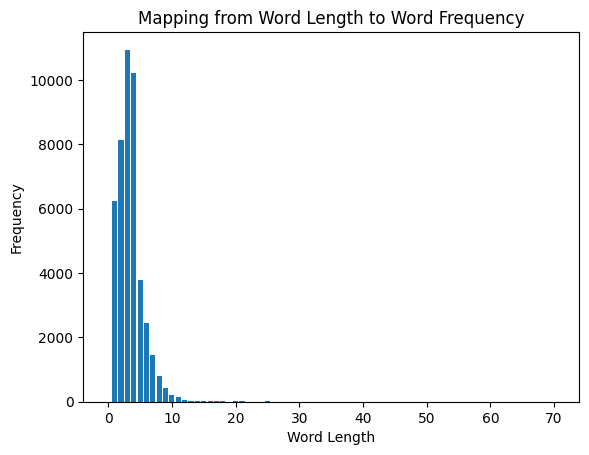

In [18]:
import matplotlib.pyplot as plt

word_lengths = [len(word) for word in textN]
freq_dist_word_lengths = FreqDist(word_lengths)
plt.bar(freq_dist_word_lengths.keys(), freq_dist_word_lengths.values())
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Mapping from Word Length to Word Frequency')
plt.show()

In [20]:
def words_at_end_of_sentence(text):
    end_words = []
    for sent in text:
        if len(sent) > 0:
            end_words.append(sent[-1])
    return end_words

end_words = words_at_end_of_sentence(textN)
freq_dist_end_words = FreqDist(end_words)
most_frequent_end_words = freq_dist_end_words.most_common(10)
print("10 most frequent words occurring at the end of the sentence:", most_frequent_end_words)

10 most frequent words occurring at the end of the sentence: [('e', 4860), ('s', 3410), ('t', 3334), ('.', 2546), ('y', 2155), ('o', 1979), ('n', 1808), ('d', 1794), ('l', 1654), ('r', 1399)]


### ***Task 2***

Displaying 13 of 13 matches:
не говорить ні слова , а вона ж не є німа , тому вона думає безперервно . Отак
не говорить . Вони думають , що вона німа . А вона не німа . Даруся просто не 
и думають , що вона німа . А вона не німа . Даруся просто не хоче говорити . С
 . Що з того , що вона не говорить ? Німа Катрінка також лиш на мигах показує 
 вислідить ? ! Донесе , що вона і не німа , і не дурна , і не солодка ? ! Для 
ати на бідну дівчину ! Та вона хоч і німа , але у десять раз розумніша від цих
 – Слухаю вас , шановний . – Вона не німа , — розвернувся Іван до Дарусі і май
ця , — показав пальцем на Дарусю , — німа . І не мороч їй голову . — І доктор 
би на добре… а то ж дитина може бути німа . – Язик би ваш чиряками обкинуло , 
рокуєте ! Чого б то дитина мала бути німа , коли тато з мамою говорящі ? ! – А
а них , та правдиву правду сказати . Німа Даруся не дуже велику правду скаже… 
і гаразду . Ніц нічого… Одна нещасна німа Дару ся , що за всіх відбуває гріхи 
ця наша солодка Даруся 

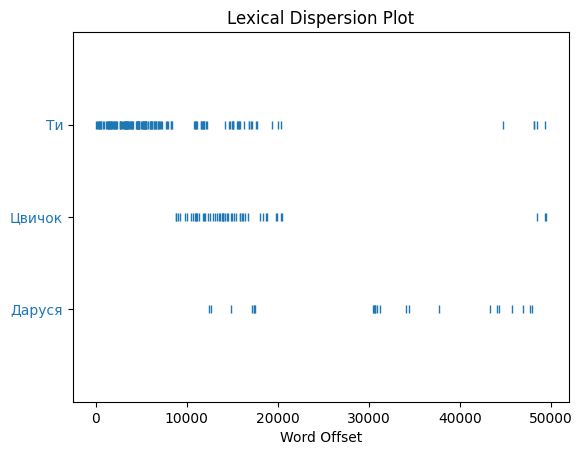

In [23]:
with open('matios-mariia-vasylivna-solodka-darusia15283.txt', 'r', encoding='utf-8') as f:
    raw = f.read()

tokens = word_tokenize(raw)
custom_text = Text(tokens)
custom_text.concordance("німа")
custom_text.similar("Даруся")
custom_text.dispersion_plot(["Даруся", "Цвичок", "Ти"])
fdist = nltk.FreqDist(tokens)
print(fdist.most_common(20))

### ***Task 3***

In [28]:
def identify_money_amounts(text):
    amounts = []
    words = text.split()
    for word in words:
        if word.startswith('$') and any(char.isdigit() for char in word[1:]):
            amount = ''.join(char for char in word[1:] if char.isdigit() or char == '.')
            amounts.append(float(amount))
    return amounts

def sum_money_amounts(text):
    amounts = identify_money_amounts(text)
    total = sum(amounts)
    return total

text = "Could you trade me 10 $5 bills for 5 $100 bills?"
total_amount = sum_money_amounts(text)
print("Total sum of money amounts:", total_amount)


Total sum of monetary amounts: 105.0


### ***Task 4***

In [35]:
import re
import json

def process_json(json_str):
    data = json.loads(json_str)
    data["Config"]["Nodes"] = [node for node in data["Config"]["Nodes"] if not node.startswith("8.")]

    data["Config"]["Server"] = {
        "name": data["Config"]["Server"].split('.')[0],
        "type": data["Config"]["Server"].split('.')[1]
    }

    return data

json_str = '''
{
    "HTTPHost": "localhost",
    "HTTPPort": 8545,
    "Config": {
        "Enabled": true,
        "Server": "wakuv2.prod",
        "Nodes": ["8.210.222.231", "168.166.125.145"]
    }
}
'''

processed_data = process_json(json_str)
print(json.dumps(processed_data, indent=4))


{
    "HTTPHost": "localhost",
    "HTTPPort": 8545,
    "Config": {
        "Enabled": true,
        "Server": {
            "name": "wakuv2",
            "type": "prod"
        },
        "Nodes": [
            "168.166.125.145"
        ]
    }
}
